### Huấn luyện và dự đoán

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from helper.text_helper import find_words

ModuleNotFoundError: No module named 'grp'

#### Trực quan hóa dữ liệu đầu vào

In [5]:
df = pd.read_csv('Danh_gia_final.csv')
df[:50]

,id,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,noi_dung_binh_luan_sau_xu_ly
0,1,443,SỬ DỤNG DỄ DÀNG RẤT THOẢI MÁI THƯ GIÃN TỘT ĐỘ,29/04/2023,17:06,5,308500015,dễ_dàng thoải_mái thư_giãn
1,2,1030,Sử dụng dễ dãng rất thoải mái thư giãn tột độ,30/04/2023,15:04,5,308500015,dãng thoải_mái thư_giãn
2,3,689,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594,thích tẩy_trang
3,4,2519,Sản phẩm có khả năng làm sạch tốt Lớp trang đi...,17/07/2022,13:48,5,204100075,khả_năng sạch tốt lớp trang_điểm mắt môi_chóng...
4,5,402,Sữa rửa mặt tốt sạch mụn mịn da đáng mua nha,15/04/2023,23:04,5,422208977,sữa rửa mặt tốt sạch mụn mịn
5,7,2517,Sau 77 49 dòng srm thì chân ái là đây mua tu...,25/12/2022,17:11,5,204100019,dòng sửa rửa mặt chân_ái tuyp thử ok nhờn khô_...
6,8,1750,Đó giờ mình sài bha của obagi cũng 34 chai rồi...,9/7/2022,4:34,5,100220035,sài bha obagi đổi thử_sài plc hàng kèm quà tặn...
7,9,3394,Rất ok mình xài 2 chai rồi,7/7/2022,11:18,5,204100024,ok xài
8,10,1817,Mik bị kich ứng không hợp sản phẩm sd được 3...,5/2/2024,3:50,4,422216354,ứng_không_hợp
9,11,3556,nhân viên tư vấn như mới train và được nhận vì...,12/9/2023,22:33,5,100250032,tư_vấn train đẹp thôi_át dán mụn trả_lời tè_ra...


In [6]:
df["noi_dung_binh_luan"] = df["noi_dung_binh_luan"].fillna("")

In [7]:
# Chuyển đổi TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["noi_dung_binh_luan"])

In [8]:
# Gán nhãn sentiment dựa trên số sao
df["sentiment"] = df["so_sao"].apply(lambda x: "Positive" if x >= 4 else "Negative" if x <= 2 else "Neutral")

In [9]:
# SMOTE để xử lý mất cân bằng
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, df["sentiment"])

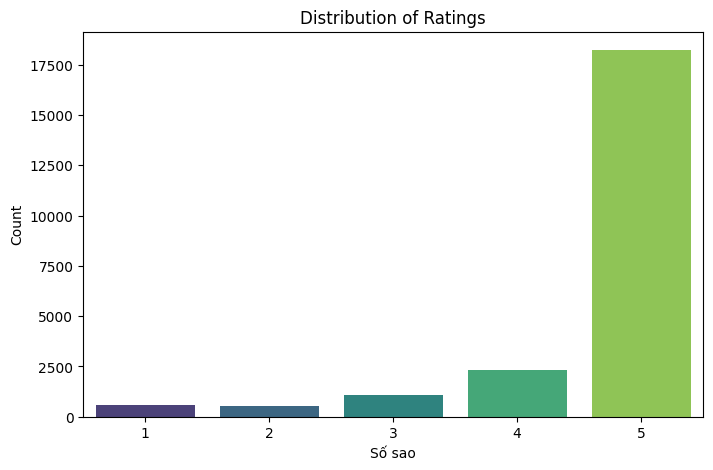

In [10]:
# Trực quan hóa phân phối số sao
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='so_sao', palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Số sao")
plt.ylabel("Count")
plt.show()

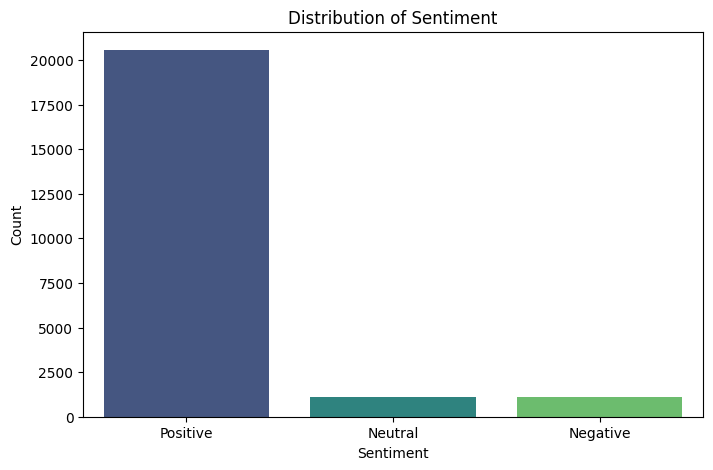

In [11]:
# Trực quan hóa Sentiment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#### Feature Engineering

In [12]:
positive_words = [
    "ok", "thoải mái", "hiệu quả", "nâng tông", "mướt", "mịn", "dễ chịu", "mượt", "thơm", "dịu nhẹ", "tươi trẻ", "mềm mại", "làm sáng", "làm đều màu",
    "chống lão hóa", "dưỡng ẩm", "ngừa mụn", "thư giãn", "không kích ứng", "tăng độ đàn hồi",
    "sạch sâu", "giảm thâm", "mát lạnh", "làm dịu", "tươi mát", "phục hồi", "dưỡng trắng",
    "trẻ hóa", "tẩy tế bào chết", "sáng da", "khôi phục", "bảo vệ", "chống nắng",

    "xem review", "ưu tiên thương hiệu", "chọn sản phẩm tự nhiên", "mua số lượng lớn", "canh giảm giá", "tìm khuyến mãi", "tin tưởng", "tặng quà", 
    "đăng ký thành viên", "quay lại mua", "đặt hàng online", "dùng voucher", 
    "chọn sản phẩm chính hãng",
    
    "thích", "tốt", "xuất sắc", "tuyệt vời", "ổn",
    "hài lòng", "ưng ý", "hoàn hảo", "chất lượng", "nhanh",
    "tiện lợi", "dễ sử dụng", "hiệu quả", "ấn tượng",
    "nổi bật", "thân thiện",
    "cao cấp", "độc đáo", "rất tốt", "rất thích", "tận tâm", "đáng tin cậy", "đẳng cấp",
    "hấp dẫn", "an tâm", "thúc đẩy", "cảm động", "phục vụ tốt", "làm hài lòng", "gây ấn tượng", "nổi trội",
    "sáng tạo", "phù hợp", "tận tâm", "hiếm có", "cải thiện", "hoà nhã", "chăm chỉ", "cẩn thận",
    "vui vẻ", "sáng sủa", "hào hứng", "đam mê", "vừa vặn", "đáng tiền"
]

In [13]:
negative_words = [
    "mắc", "khô", "nặng", "dầu", "kích ứng", "dị ứng", "tắc nghẽn lỗ chân lông", 
    "ngứa", "bóng nhờn", "tạo cảm giác dính", "khó thấm", "bít tắc", 
    "nặng mặt", "kém hiệu quả", "bóng dầu", "thô ráp", "lão hóa", "đỏ rát",
    "mùi hôi", "không hiệu quả",

    "chọn sản phẩm kém chất lượng", "chọn sản phẩm không phù hợp",

    "kém", "tệ", "buồn", "chán", "không dễ chịu", "không chất lượng"
    "kém chất lượng", "không thích", "không ổn",
    "không hợp", "không đáng tin cậy", "không chuyên nghiệp",
    "không phản hồi", "không an toàn", "không phù hợp", "không thân thiện", "không linh hoạt", "không đáng giá",
    "không ấn tượng", "không tốt", "chậm", "khó khăn", "phức tạp",
    "khó chịu", "gây khó dễ", "rườm rà", "thất bại", "tồi tệ", "khó xử", "không thể chấp nhận", "tồi tệ","không rõ ràng",
    "không chắc chắn", "rối rắm", "không tiện lợi", "không đáng tiền",
    'không hài lòng', 'không đáng', 'quá tệ', 'rất tệ',
    'thất vọng', 'chán', 'tệ hại', 'kinh khủng', 'không ưng ý'
]

In [14]:
positive_count, positive_word_list = find_words(df['noi_dung_binh_luan'][1000], positive_words)

print("Number of positive words:", positive_count)
print("List of positive words:", positive_word_list)

NameError: name 'find_words' is not defined

#### Pipeline cho 4 thuật toán Machine Learning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
# Tạo pipeline Logistic Regression
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=100))
])

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Đánh giá
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

    Negative       0.97      0.94      0.95      5584
     Neutral       0.89      0.95      0.92      5521
    Positive       0.95      0.90      0.92      5458

    accuracy                           0.93     16563
   macro avg       0.93      0.93      0.93     16563
weighted avg       0.93      0.93      0.93     16563

Accuracy: 0.932258648795508


In [ ]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Đánh giá
print("Random Forest Classifier")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classifier
              precision    recall  f1-score   support

    Negative       1.00      0.99      0.99      5584
     Neutral       0.99      0.96      0.97      5521
    Positive       0.95      0.99      0.97      5458

    accuracy                           0.98     16563
   macro avg       0.98      0.98      0.98     16563
weighted avg       0.98      0.98      0.98     16563

Accuracy: 0.9785063092434946


In [ ]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Đánh giá
print("Support Vector Machine")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Support Vector Machine
              precision    recall  f1-score   support

    Negative       1.00      0.96      0.98      5584
     Neutral       0.91      1.00      0.95      5521
    Positive       1.00      0.94      0.97      5458

    accuracy                           0.96     16563
   macro avg       0.97      0.96      0.96     16563
weighted avg       0.97      0.96      0.96     16563

Accuracy: 0.9632916742136086


In [ ]:
# XGBoost
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Đánh giá
print("XGBoost")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

XGBoost
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5584
           1       0.95      0.93      0.94      5521
           2       0.92      0.95      0.94      5458

    accuracy                           0.95     16563
   macro avg       0.95      0.95      0.95     16563
weighted avg       0.95      0.95      0.95     16563

Accuracy: 0.950492060617038


####  Pipeline cho 3 thuật toán Big Data

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF
from pyspark.ml.classification import LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Tạo Spark Session
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

In [ ]:
# Tạo DataFrame PySpark
spark_df = spark.createDataFrame(df)
spark_df = spark_df.withColumn("Label", when(spark_df.sentiment == "Positive", 1)
                                          .when(spark_df.sentiment == "Neutral", 0)
                                          .otherwise(-1))

In [ ]:
# Chia tập dữ liệu
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Pipeline xử lý văn bản
tokenizer = Tokenizer(inputCol="noi_dung_binh_luan", outputCol="Words")
remover = StopWordsRemover(inputCol="Words", outputCol="FilteredWords")
vectorizer = CountVectorizer(inputCol="FilteredWords", outputCol="RawFeatures")
idf = IDF(inputCol="RawFeatures", outputCol="Features")

In [ ]:
# Logistic Regression
lr = LogisticRegression(featuresCol="Features", labelCol="Label", maxIter=10)
lr_pipeline = Pipeline(stages=[tokenizer, remover, vectorizer, idf, lr])
lr_model = lr_pipeline.fit(train_data)
lr_predictions = lr_model.transform(test_data)
lr_evaluator = MulticlassClassificationEvaluator(labelCol="Label", metricName="accuracy")
print("Logistic Regression Accuracy:", lr_evaluator.evaluate(lr_predictions))

In [ ]:
# Naive Bayes
nb = NaiveBayes(featuresCol="Features", labelCol="Label")
nb_pipeline = Pipeline(stages=[tokenizer, remover, vectorizer, idf, nb])
nb_model = nb_pipeline.fit(train_data)
nb_predictions = nb_model.transform(test_data)
nb_evaluator = MulticlassClassificationEvaluator(labelCol="Label", metricName="accuracy")
print("Naive Bayes Accuracy:", nb_evaluator.evaluate(nb_predictions))

In [ ]:
# Mô hình 3

#### Pipeline cho Deep Learning

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
# Chuẩn bị dữ liệu cho Deep Learning
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['noi_dung_binh_luan'])
X = tokenizer.texts_to_sequences(df['noi_dung_binh_luan'])
X = pad_sequences(X, maxlen=100)
y = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0 if x == 'Neutral' else -1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Mô hình LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dense(1, activation='tanh')
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
# Huấn luyện
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

#### Thử nghiệm với dữ liệu

In [ ]:
df.head()

,id,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,sentiment
0,1,443,dễ_dàng thoải_mái thư_giãn,29/04/2023,17:06,5,308500015,Positive
1,2,1030,dãng thoải_mái thư_giãn,30/04/2023,15:04,5,308500015,Positive
2,3,689,thích hasaki sản_phẩm tẩy,30/04/2023,18:34,5,422216594,Positive
3,4,2519,sản_phẩm khả_năng sạch tốt lớp mắt môi_chóng l...,17/07/2022,13:48,5,204100075,Positive
4,5,402,sữa rửa mặt tốt sạch mụn mịn,15/04/2023,23:04,5,422208977,Positive


In [ ]:
product_data = df[df["ma_san_pham"] == product_id]
product_data

,id,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,sentiment
0,1,443,dễ_dàng thoải_mái thư_giãn,29/04/2023,17:06,5,308500015,Positive
1,2,1030,dãng thoải_mái thư_giãn,30/04/2023,15:04,5,308500015,Positive
78,85,2382,nhẹ_nhàng thoải_mái thư_giãn,29/04/2023,12:40,5,308500015,Positive
175,189,712,,27/04/2023,17:29,5,308500015,Positive
546,578,2311,dễ_dàng thoải_mái thư_giãn,5/5/2023,10:01,4,308500015,Positive
...,...,...,...,...,...,...,...,...
20401,21327,2446,hộp xài,26/07/2020,0:59,5,308500015,Positive
20457,21387,687,dễ_dàng thư_dãng tột_đột thoải_mái,1/5/2023,10:01,5,308500015,Positive
20517,21450,2338,tốt,2/5/2023,11:35,5,308500015,Positive
20626,21563,2402,dễ_dàng,27/04/2023,14:12,5,308500015,Positive


Số nhận xét tích cực: 235
Số nhận xét tiêu cực: 11


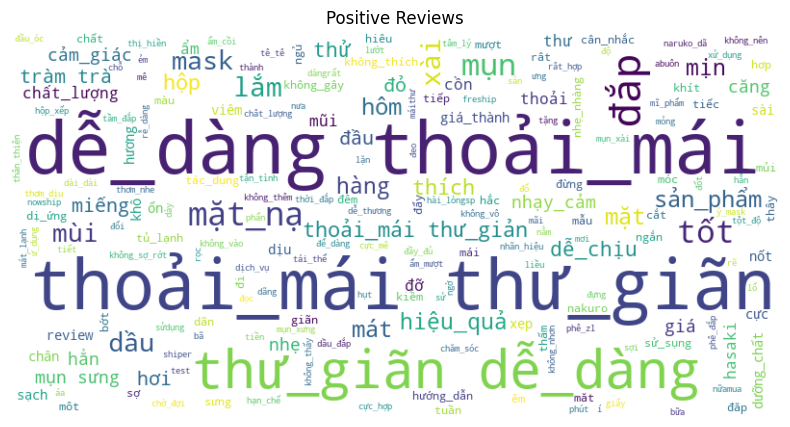

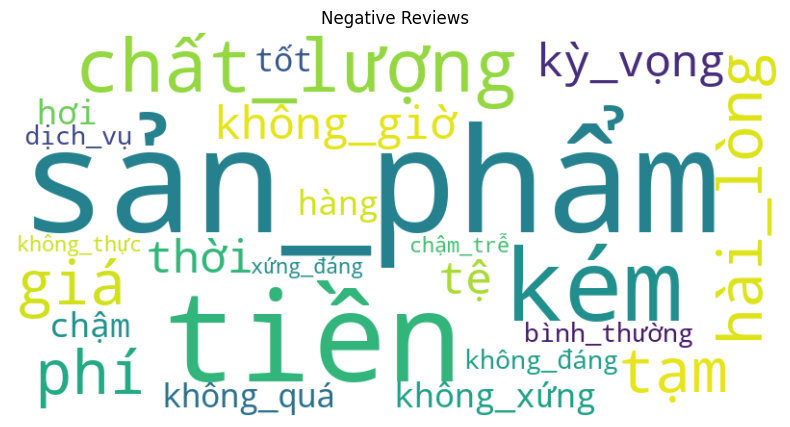

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lọc dữ liệu
product_id = 308500015
product_data = df[df["ma_san_pham"] == product_id]
product_data
# Tính số lượng
positive_reviews = product_data[product_data["sentiment"] == "Positive"]
negative_reviews = product_data[product_data["sentiment"] == "Negative"]

print(f"Số nhận xét tích cực: {len(positive_reviews)}")
print(f"Số nhận xét tiêu cực: {len(negative_reviews)}")

# WordCloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(positive_reviews["noi_dung_binh_luan"], "Positive Reviews")
generate_wordcloud(negative_reviews["noi_dung_binh_luan"], "Negative Reviews")